<a href="https://colab.research.google.com/github/betul13/Ada_Lovelace_Akademi_Homework/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv(r"/content/SolarPrediction.csv")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [114]:
def check_df(dataframe):
    print("############ SHAPE #########")
    print(dataframe.shape)
    print("############ Types #########")
    print(dataframe.dtypes)
    print("############ Describe ######")
    print(dataframe.describe())
    print("############ NA ############")
    print(dataframe.isnull().sum())
check_df(df)

############ SHAPE #########
(32686, 11)
############ Types #########
UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object
############ Describe ######
           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     5

In [115]:
# 'Data' sütununu datetime türüne çevirip ve AM/PM bilgisini kaldıralım
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y %I:%M:%S %p')

df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day
df['Year'] = df['Data'].dt.year

df = df.drop("Data",axis = 1)
df.head()


,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Year
0,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016
1,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016
2,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016
3,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016
4,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016


In [116]:
# 'Time' sütununu datetime türüne çevirelim (sadece saat kısmını alarak)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute
df["Second"] = df["Time"].dt.second
df = df.drop(["Time"], axis = 1)

df.head()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Year,Hour,Minute,Second
0,1475229326,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016,23,55,26
1,1475229023,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016,23,50,23
2,1475228726,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016,23,45,26
3,1475228421,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016,23,40,21
4,1475228124,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016,23,35,24


In [117]:

df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.time

df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.time

df['SunShineDuration'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S') - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')

# Sadece saat kısmını alın
df['SunShineDuration'] = df['SunShineDuration'].dt.components['hours']

df = df.drop(["TimeSunRise", "TimeSunSet"], axis = 1)

df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,SunShineDuration
0,1475229326,1.21,48,30.46,59,177.39,5.62,9,29,2016,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,9,29,2016,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,9,29,2016,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,9,29,2016,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,9,29,2016,23,35,24,12


In [118]:
check_df(df) #eksik değer yok

############ SHAPE #########
(32686, 14)
############ Types #########
UNIXTime                    int64
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int64
Day                         int64
Year                        int64
Hour                        int64
Minute                      int64
Second                      int64
SunShineDuration            int64
dtype: object
############ Describe ######
           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e

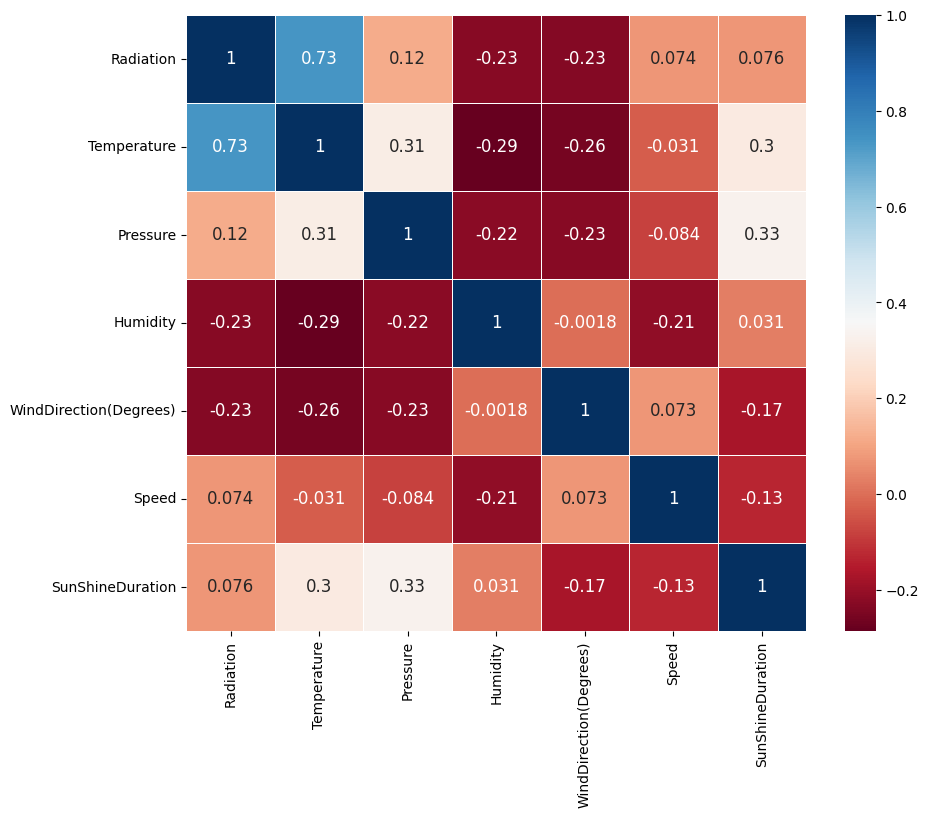

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Year', 'Hour',
       'Minute', 'Second', 'SunShineDuration'],
      dtype='object')


In [119]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

columns = ['Radiation',
 'Temperature',
 'Pressure',
 'Humidity',
 'WindDirection(Degrees)',
 'Speed',"SunShineDuration"]

correlation_matrix(df, columns) #sıcaklık ve ışımanın korelasyonu çok yüksek
print(df.columns)




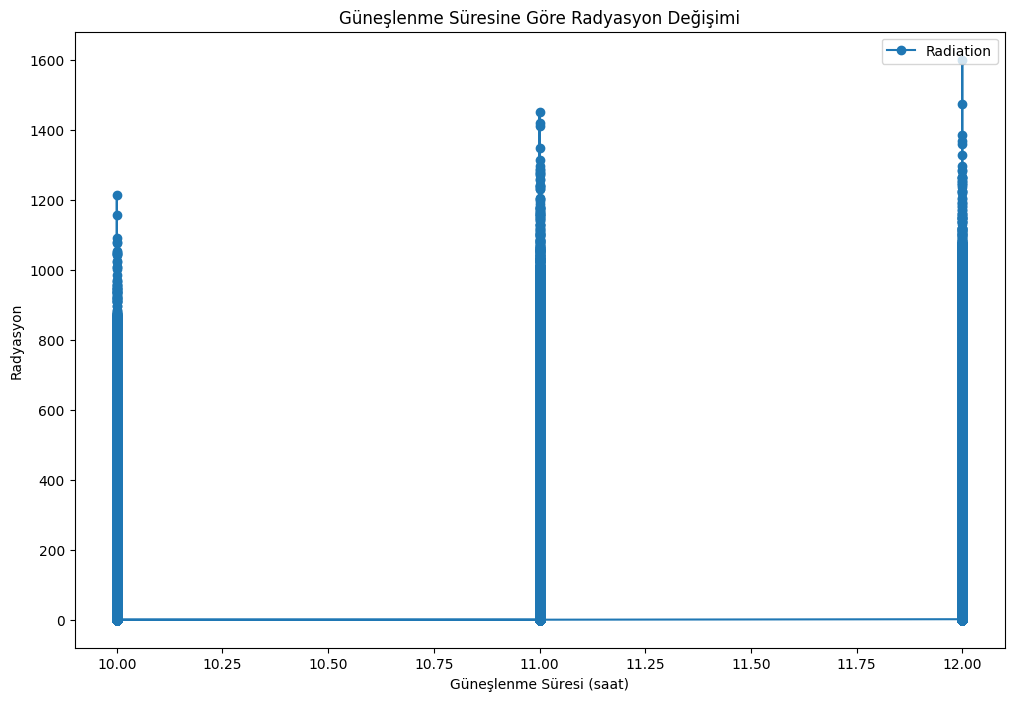

In [120]:
df.plot(x='SunShineDuration', y='Radiation', figsize=(12, 8), title='Güneşlenme Süresine Göre Radyasyon Değişimi', marker='o')
plt.xlabel('Güneşlenme Süresi (saat)')
plt.ylabel('Radyasyon')
plt.legend(loc='upper right')
plt.show()



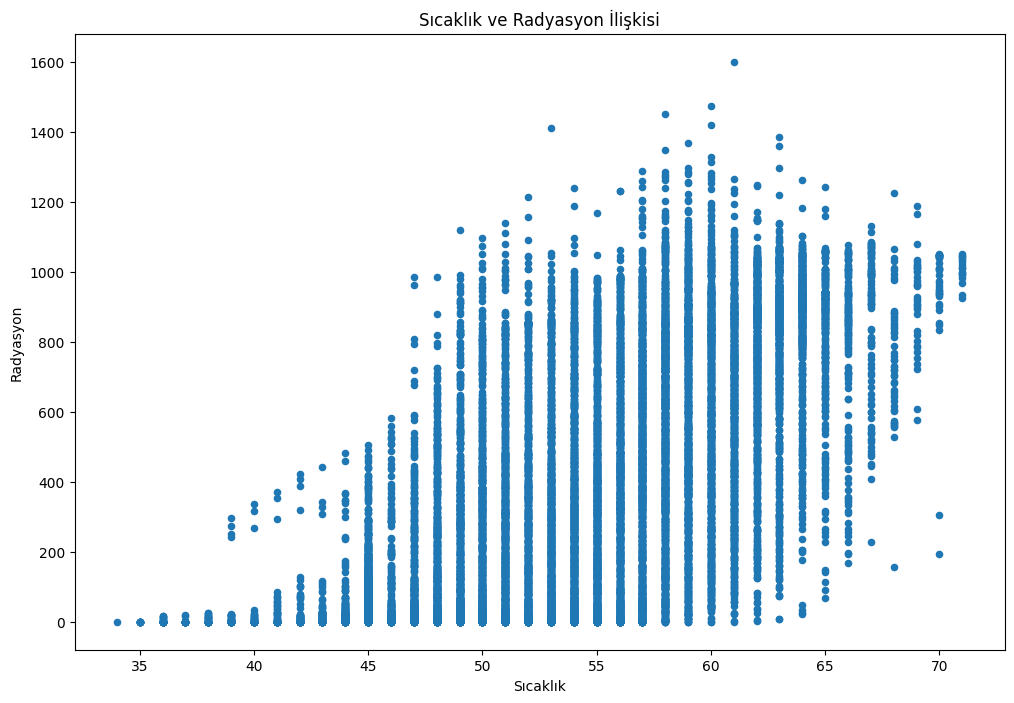

In [121]:
df.plot.scatter(x='Temperature', y='Radiation', figsize=(12, 8), title='Sıcaklık ve Radyasyon İlişkisi')
plt.xlabel('Sıcaklık')
plt.ylabel('Radyasyon')
plt.show()


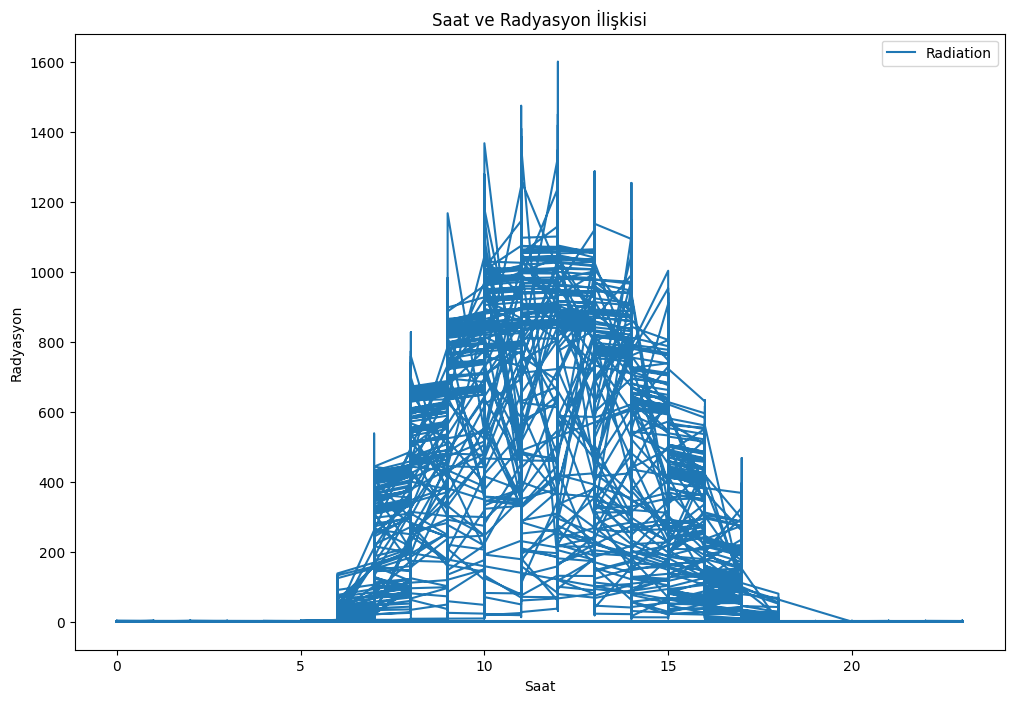

In [122]:
df.plot.line(x='Hour', y='Radiation', figsize=(12, 8), title='Saat ve Radyasyon İlişkisi')
plt.xlabel('Saat')
plt.ylabel('Radyasyon')
plt.show()


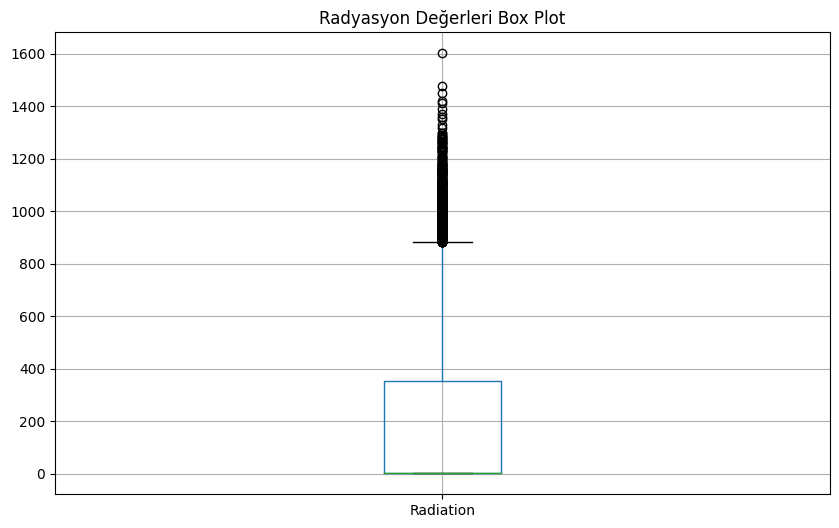

In [123]:
df[['Radiation']].boxplot(figsize=(10, 6))
plt.title('Radyasyon Değerleri Box Plot')
plt.show()


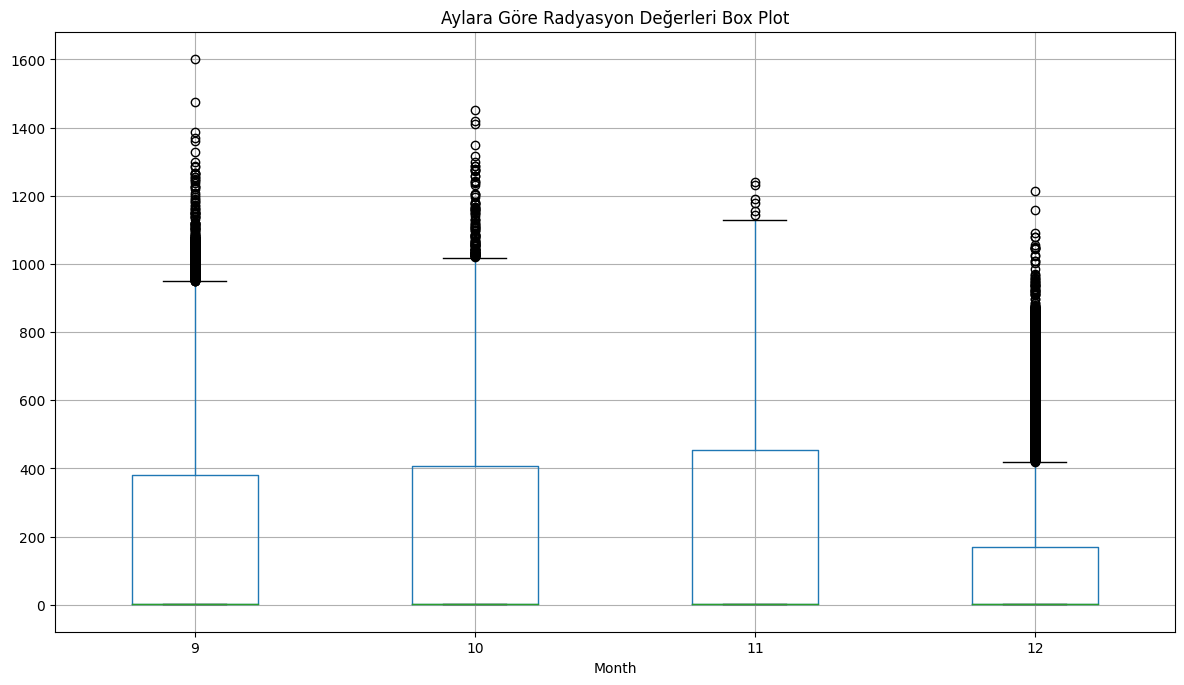

In [124]:
df.boxplot(column='Radiation', by='Month', figsize=(14, 8))
plt.title('Aylara Göre Radyasyon Değerleri Box Plot')
plt.suptitle('')
plt.show()


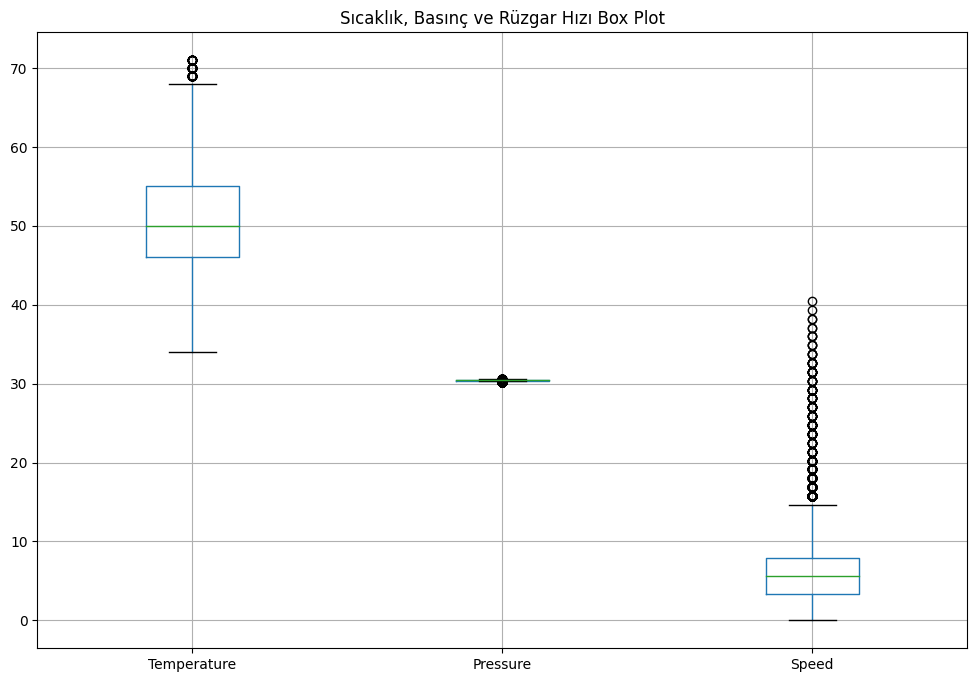

In [125]:
df[['Temperature', 'Pressure', 'Speed']].boxplot(figsize=(12, 8))
plt.title('Sıcaklık, Basınç ve Rüzgar Hızı Box Plot')
plt.show()


In [126]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

list_ = ['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'SunShineDuration']

for col in list_:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

for col in list_:
    print(f"Outliers in {col}: {check_outlier(df, col)}")

Outliers in Radiation: False
Outliers in Temperature: False
Outliers in Pressure: False
Outliers in Humidity: False
Outliers in WindDirection(Degrees): False
Outliers in SunShineDuration: False
